In [1]:
import pandas as pd
import numpy as np

from time import time
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
from tools import plot_significant_features
# from model import build_model
from model import build_simple_model as build_model

In [9]:
df = pd.read_csv('data/Tweets.csv')
texts = np.array(df["text"])

In [3]:
# uncomment if you dont care about neutral tweets
# df = df.loc[df['airline_sentiment'].isin(['negative', 'positive'])]

X = df['text'].values

y = df['airline_sentiment']
y = y.map({'negative': -1, 'neutral': 0, 'positive': 1}).values  # Score:0.7634365520206998

In [4]:
pipeline = build_model()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

t0 = time()

pipeline.fit(X_train, y_train)

scores = cross_val_score(pipeline, X_test, y_test)
print("Total done in %0.3fs" % (time() - t0))

Total done in 81.192s


Score:0.7634365520206998
Total features: 10000


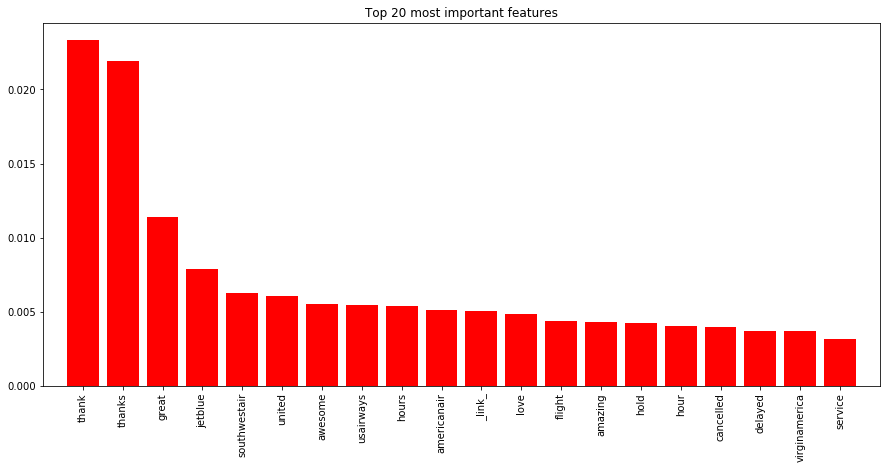

In [6]:
score = scores.mean()
print("Score:{}".format(score))
plot_significant_features(pipeline=pipeline)